# Pyber Challenge

### Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [9]:
city_data_df.groupby(['type']).count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares_ride = total_fares/total_rides

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fares_driver = total_fares/total_drivers

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fares_ride,
    "Average Fare per Driver": avg_fares_driver}, index=["Rural", "Suburban", "Urban"])

format_mapping = {'Total Rides': '{:,}', 'Total Drivers': '{:,}', 'Total Fares': '${:,.2f}', 'Average Fare per Ride': '${:,.2f}', 'Average Fare per Driver': '${:,.2f}'}
for key, value in format_mapping.items():
    pyber_summary_df[key] = pyber_summary_df[key].apply(value.format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [10]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [11]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_date_df = pyber_date_df.reset_index()


In [12]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_city_date = pd.pivot_table(pyber_data_df, values='fare', index='date', columns='type')
fare_city_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [13]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
april = fare_city_date.loc['2019-01-01':'2019-04-29']

In [14]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
april.index = pd.to_datetime(april.index)

In [15]:
# 7. Check that the datatype for the index is datetime using df.info()
april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [16]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_per_week = april.resample('W').sum()
fare_per_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


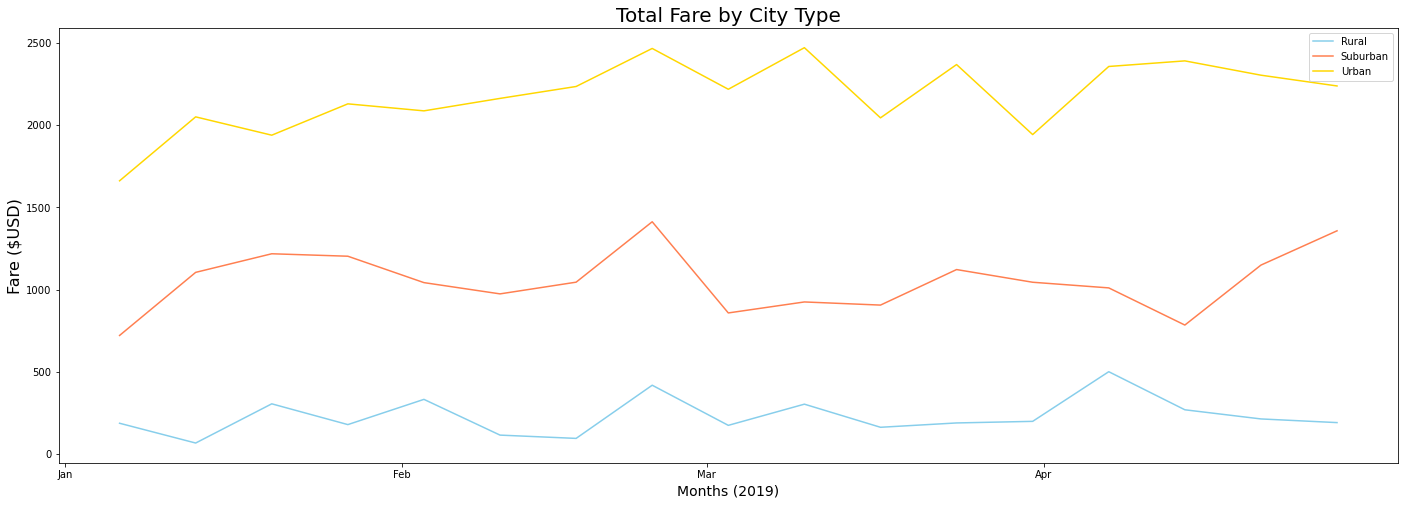

In [17]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots(figsize=(24,8))
x_labels = ["Rural", "Suburban", "Urban"]
fares = [fare_per_week["Rural"], fare_per_week["Suburban"], fare_per_week["Urban"]]
ax.plot(fare_per_week.index, fare_per_week["Rural"], c="skyblue", label="Rural")
ax.plot(fare_per_week.index, fare_per_week["Suburban"], c="coral", label="Suburban")
ax.plot(fare_per_week.index, fare_per_week["Urban"], c="gold", label="Urban")
ax.legend(loc='best')

drange = pd.date_range(start='2019-01-01', end='2019-04-01', freq='MS')
dlabel = ['Jan', 'Feb', 'Mar', 'Apr']
ax.set_xticks(drange)
ax.set_xticklabels(dlabel)

ax.set_title('Total Fare by City Type', fontsize=20)
ax.set_xlabel('Months (2019)', fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=16)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig('analysis/PyBer_fare_summary.png')
